## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

#for RFE and linear regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the datasets
Bikes = pd.read_csv("/Users/anilkumar/Desktop/DataScience/MachineLearning/day.csv")

# Flow of assignment

##  Step 1: Reading and understanding the data

In [3]:
Bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
Bikes.shape

(730, 16)

In [5]:
Bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
Bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#dropped the columns which are not requred for the study purpose
cols=['instant', 'dteday', 'casual', 'registered']
Bikes=Bikes.drop(columns=cols, axis=1)

In [8]:
Bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
#some of the column names arent easily readable/understandable.  So rename them
Bikes.rename(columns={'yr':'year', 'temp':'temperature', 'mnth':'month', 'weathersit':'weathersituation', 'hum':'humidity', 'cnt':'count'},
            inplace=True)

In [10]:
Bikes.head()

,season,year,month,holiday,weekday,workingday,weathersituation,temperature,atemp,humidity,windspeed,count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
#checking if there are missing values

Bikes.isnull().sum()

season              0
year                0
month               0
holiday             0
weekday             0
workingday          0
weathersituation    0
temperature         0
atemp               0
humidity            0
windspeed           0
count               0
dtype: int64

In [12]:
Bikes.shape

(730, 12)

## Step 2:  Label encoding 

##### Mapping season column
1: spring,
2: summer,
3: fall,
4: winter

In [13]:
Season_Category = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}

Bikes['season'] = Bikes['season'].map(Season_Category)
Bikes.head()

,season,year,month,holiday,weekday,workingday,weathersituation,temperature,atemp,humidity,windspeed,count
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


##### Mapping weather situation column
1: Clear, Few clouds, Partly cloudy, Partly cloudy, 
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, 
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds, 
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [14]:
weathersit_category = {1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}
Bikes['weathersituation'] = Bikes['weathersituation'].map(weathersit_category)

In [15]:
weekday_category={0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"}
Bikes['weekday'] = Bikes['weekday'].map(weekday_category)
Bikes.head()

,season,year,month,holiday,weekday,workingday,weathersituation,temperature,atemp,humidity,windspeed,count
0,spring,0,1,0,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
Bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            730 non-null    object 
 1   year              730 non-null    int64  
 2   month             730 non-null    int64  
 3   holiday           730 non-null    int64  
 4   weekday           730 non-null    object 
 5   workingday        730 non-null    int64  
 6   weathersituation  730 non-null    object 
 7   temperature       730 non-null    float64
 8   atemp             730 non-null    float64
 9   humidity          730 non-null    float64
 10  windspeed         730 non-null    float64
 11  count             730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


In [17]:
Bikes[['temperature','atemp','humidity','windspeed','count']]=Bikes[['temperature','atemp','humidity','windspeed','count']].apply(pd.to_numeric)


In [18]:
Bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            730 non-null    object 
 1   year              730 non-null    int64  
 2   month             730 non-null    int64  
 3   holiday           730 non-null    int64  
 4   weekday           730 non-null    object 
 5   workingday        730 non-null    int64  
 6   weathersituation  730 non-null    object 
 7   temperature       730 non-null    float64
 8   atemp             730 non-null    float64
 9   humidity          730 non-null    float64
 10  windspeed         730 non-null    float64
 11  count             730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


In [19]:
#check unique values
Bikes.nunique()

season                4
year                  2
month                12
holiday               2
weekday               7
workingday            2
weathersituation      3
temperature         498
atemp               689
humidity            594
windspeed           649
count               695
dtype: int64

# Step 3. Exploratory data analysis and visualization

##### visualize the numerical variables

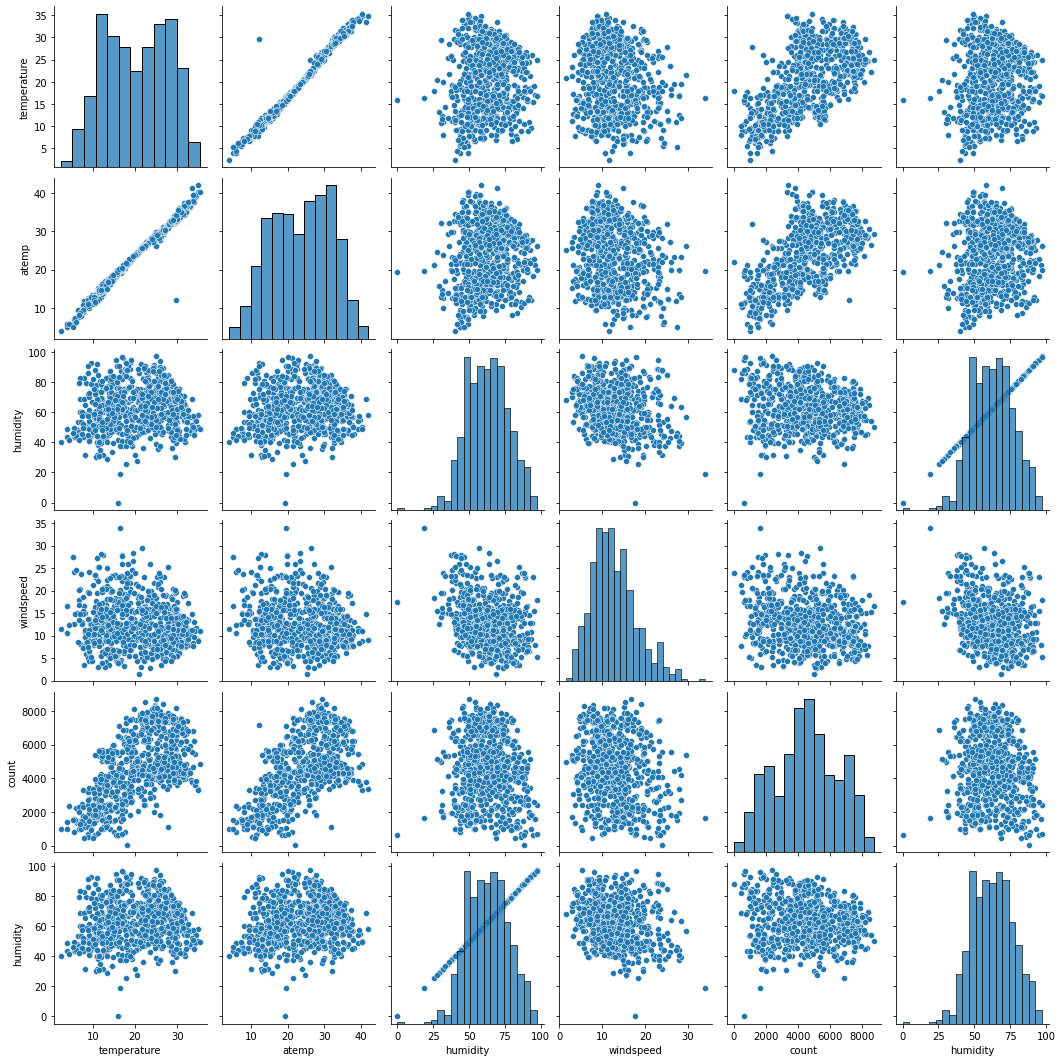

In [20]:

sns.pairplot(Bikes, vars=['temperature', 'atemp', 'humidity', 'windspeed', 'count', 'humidity'])
plt.show();

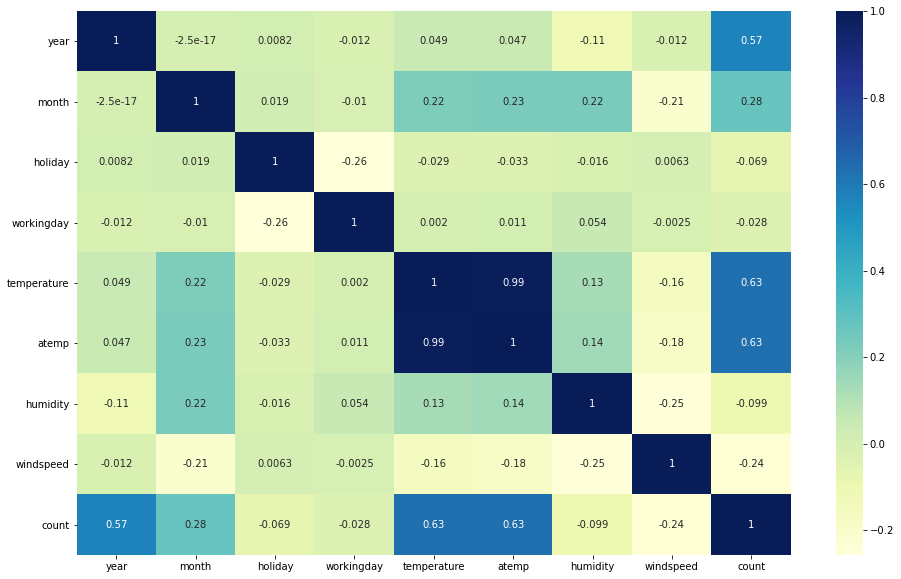

In [21]:
#checking the correlation using heat map
plt.figure(figsize=(16,10))
sns.heatmap(Bikes.corr(), annot=True, cmap='YlGnBu')
plt.show();

In [22]:
Bikes.corr()

,year,month,holiday,workingday,temperature,atemp,humidity,windspeed,count
year,1.000000e+00,-2.470170e-17,0.008195,-0.011852,0.048789,0.047215,-0.112547,-0.011624,0.569728
month,-2.470170e-17,1.000000e+00,0.018905,-0.010414,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,8.195345e-03,1.890483e-02,1.000000,-0.257009,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-1.185197e-02,-1.041372e-02,-0.257009,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.027640
temperature,4.878919e-02,2.190833e-01,-0.028764,0.002044,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,4.721519e-02,2.264302e-01,-0.032703,0.010657,0.991696,1.000000,0.141512,-0.183876,0.630685
humidity,-1.125471e-01,2.249368e-01,-0.015662,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-1.162435e-02,-2.080131e-01,0.006257,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
count,5.697285e-01,2.781909e-01,-0.068764,-0.027640,0.627044,0.630685,-0.098543,-0.235132,1.000000


In [23]:
Bikes.head()

,season,year,month,holiday,weekday,workingday,weathersituation,temperature,atemp,humidity,windspeed,count
0,spring,0,1,0,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [24]:
cols=['temperature']
Bikes=Bikes.drop(columns=cols, axis=1)

In [25]:
Bikes.head()

,season,year,month,holiday,weekday,workingday,weathersituation,atemp,humidity,windspeed,count
0,spring,0,1,0,Monday,1,Mist,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Tuesday,1,Mist,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Wednesday,1,Clear,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Thursday,1,Clear,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Friday,1,Clear,11.46350,43.6957,12.522300,1600


In [26]:
#check datatypes
Bikes.dtypes

season               object
year                  int64
month                 int64
holiday               int64
weekday              object
workingday            int64
weathersituation     object
atemp               float64
humidity            float64
windspeed           float64
count                 int64
dtype: object

##### visualizing the categorical variables

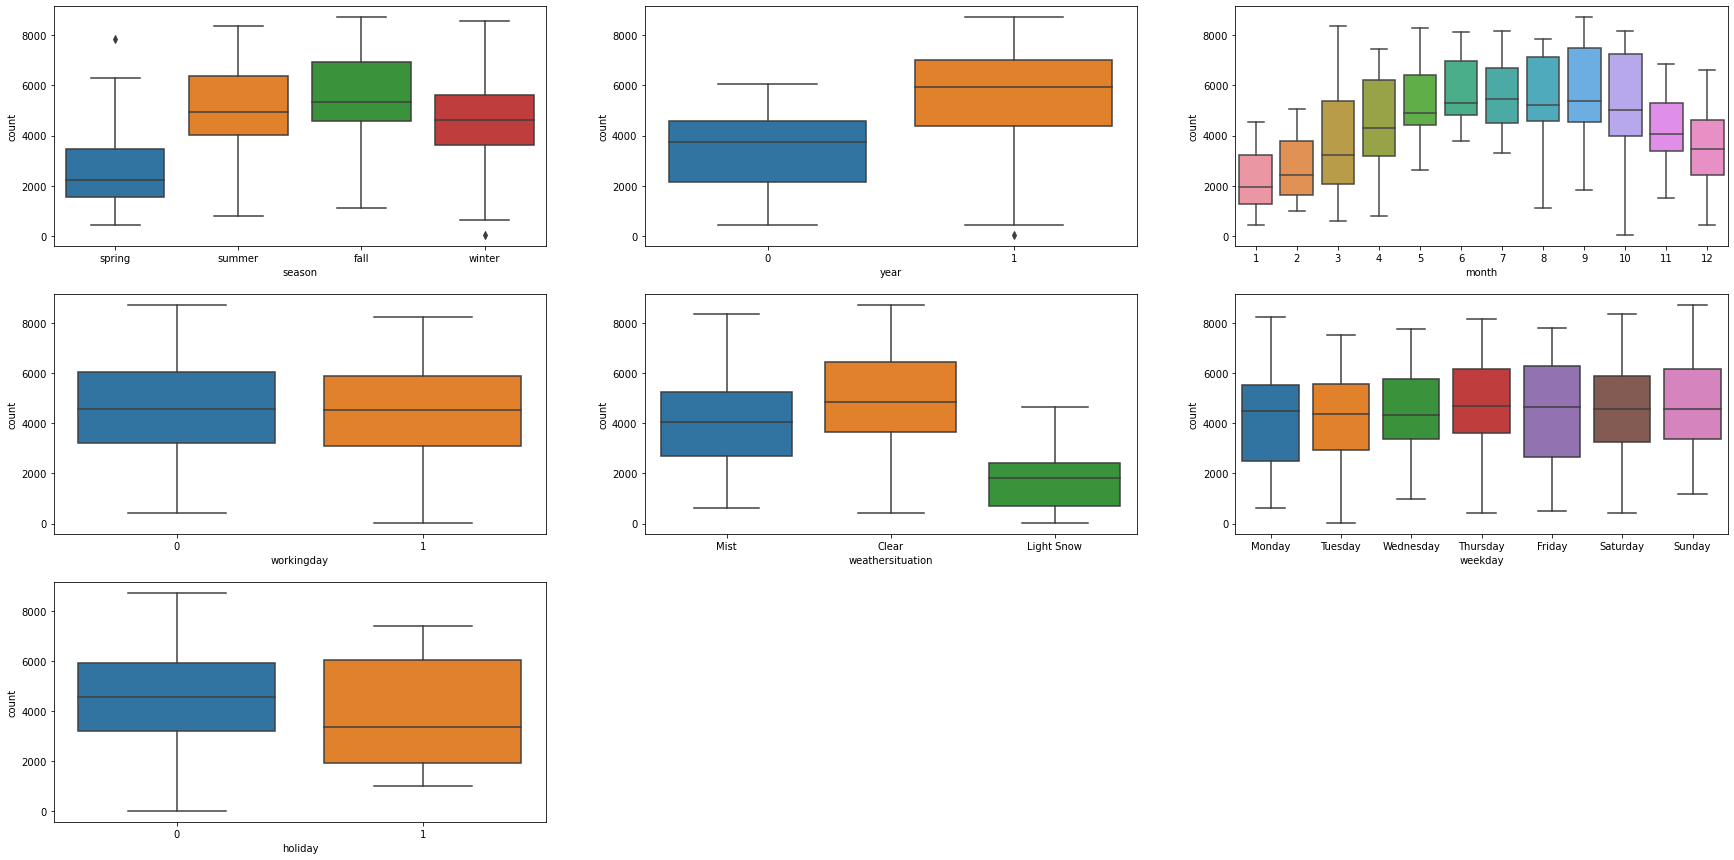

In [27]:
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'count', data = Bikes)#yr','mnth','workingday','weathersit','weekday'
plt.subplot(3,3,2)
sns.boxplot(x = 'year', y = 'count', data = Bikes)
plt.subplot(3,3,3)
sns.boxplot(x = 'month', y = 'count', data = Bikes)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'count', data = Bikes)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersituation', y = 'count', data = Bikes)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'count', data = Bikes)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'count', data = Bikes)
plt.show()

##### Each category can be understood in detail by individually visualizing

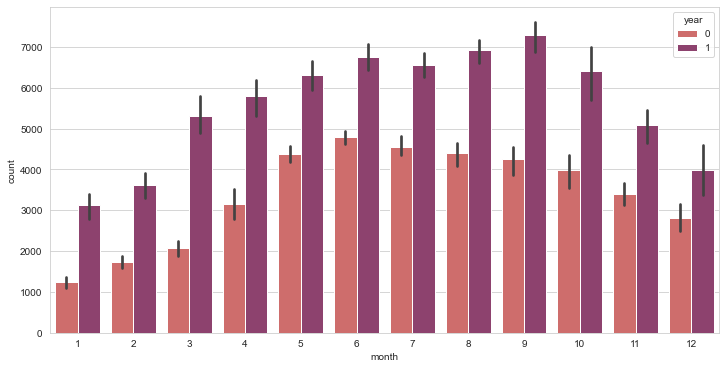

In [28]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.barplot(x='month',y='count',data=Bikes,hue='year',palette='flare')
plt.show();

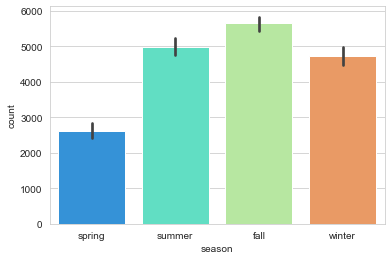

In [29]:
sns.barplot('season','count',data=Bikes,palette="rainbow",)
plt.show()

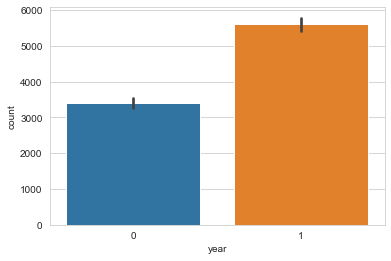

In [30]:
sns.barplot('year','count',data=Bikes)
plt.show()

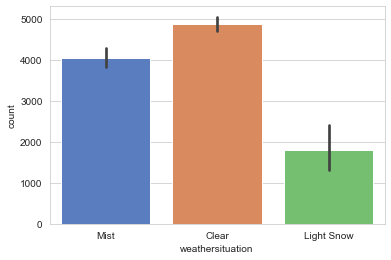

In [31]:
sns.barplot('weathersituation','count',palette="muted",data=Bikes)
plt.show()
           

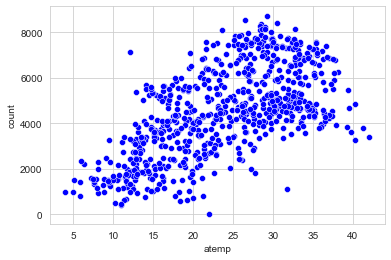

In [32]:
# scatterplot for indetail check on atemp correlation with count
sns.scatterplot(x='atemp',y='count' ,data=Bikes, color='Blue')
plt.show()

In [33]:
Bikes.head()

,season,year,month,holiday,weekday,workingday,weathersituation,atemp,humidity,windspeed,count
0,spring,0,1,0,Monday,1,Mist,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Tuesday,1,Mist,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Wednesday,1,Clear,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Thursday,1,Clear,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Friday,1,Clear,11.46350,43.6957,12.522300,1600


In [34]:
Bikes.dtypes

season               object
year                  int64
month                 int64
holiday               int64
weekday              object
workingday            int64
weathersituation     object
atemp               float64
humidity            float64
windspeed           float64
count                 int64
dtype: object

In [35]:
Bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            730 non-null    object 
 1   year              730 non-null    int64  
 2   month             730 non-null    int64  
 3   holiday           730 non-null    int64  
 4   weekday           730 non-null    object 
 5   workingday        730 non-null    int64  
 6   weathersituation  730 non-null    object 
 7   atemp             730 non-null    float64
 8   humidity          730 non-null    float64
 9   windspeed         730 non-null    float64
 10  count             730 non-null    int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 62.9+ KB


# Step 4: Dealing with categorical variables - Dummy Variables

In [36]:
#Convert some of the above variables to object
Bikes['month']=Bikes['month'].astype(object)
Bikes['season']=Bikes['season'].astype(object)
Bikes['weathersituation']=Bikes['weathersituation'].astype(object)
Bikes['weekday']=Bikes['weekday'].astype(object)
Bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            730 non-null    object 
 1   year              730 non-null    int64  
 2   month             730 non-null    object 
 3   holiday           730 non-null    int64  
 4   weekday           730 non-null    object 
 5   workingday        730 non-null    int64  
 6   weathersituation  730 non-null    object 
 7   atemp             730 non-null    float64
 8   humidity          730 non-null    float64
 9   windspeed         730 non-null    float64
 10  count             730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [37]:
#dropping first column to avoid variables effect on each other
Season_cond=pd.get_dummies(Bikes['season'],drop_first=True)
Weather_cond=pd.get_dummies(Bikes['weathersituation'],drop_first=True)
Weekday_cat=pd.get_dummies(Bikes['weekday'],drop_first=True)
Month_cat=pd.get_dummies(Bikes['month'],drop_first=True)

In [38]:
Bikes=pd.concat([Bikes,Season_cond],axis=1)
Bikes=pd.concat([Bikes,Weather_cond],axis=1)
Bikes=pd.concat([Bikes,Weekday_cat],axis=1)
Bikes=pd.concat([Bikes,Month_cat],axis=1)
Bikes.head()

,season,year,month,holiday,weekday,workingday,weathersituation,atemp,humidity,windspeed,...,3,4,5,6,7,8,9,10,11,12
0,spring,0,1,0,Monday,1,Mist,18.18125,80.5833,10.749882,...,0,0,0,0,0,0,0,0,0,0
1,spring,0,1,0,Tuesday,1,Mist,17.68695,69.6087,16.652113,...,0,0,0,0,0,0,0,0,0,0
2,spring,0,1,0,Wednesday,1,Clear,9.47025,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,0
3,spring,0,1,0,Thursday,1,Clear,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,0,0,0,0
4,spring,0,1,0,Friday,1,Clear,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [39]:
Bikes.drop(['season'],axis=1,inplace=True)
Bikes.drop(['weathersituation'],axis=1,inplace=True)
Bikes.drop(['weekday'],axis=1,inplace=True)
Bikes.drop(['month'],axis=1,inplace=True)
Bikes.head()

,year,holiday,workingday,atemp,humidity,windspeed,count,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Step 5: Split data into training and testing sets

In [40]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
Bikes_train, Bikes_test = train_test_split(Bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [41]:
#checking the shape
print(Bikes_train.shape)
print(Bikes_test.shape)

(510, 29)
(219, 29)


# Step 6: Scaling the variables


In [42]:
#scale the numerical data by using mini max scaler to obtain comparable scale of the variables
scaler = MinMaxScaler()

In [43]:
num_vars = ['atemp','humidity','windspeed','count']

Bikes_train[num_vars] = scaler.fit_transform(Bikes_train[num_vars])

In [44]:
Bikes_train.head()

,year,holiday,workingday,atemp,humidity,windspeed,count,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,1,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [45]:
Bikes_train.describe()

,year,holiday,workingday,atemp,humidity,windspeed,count,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314
std,0.500429,0.157763,0.453386,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


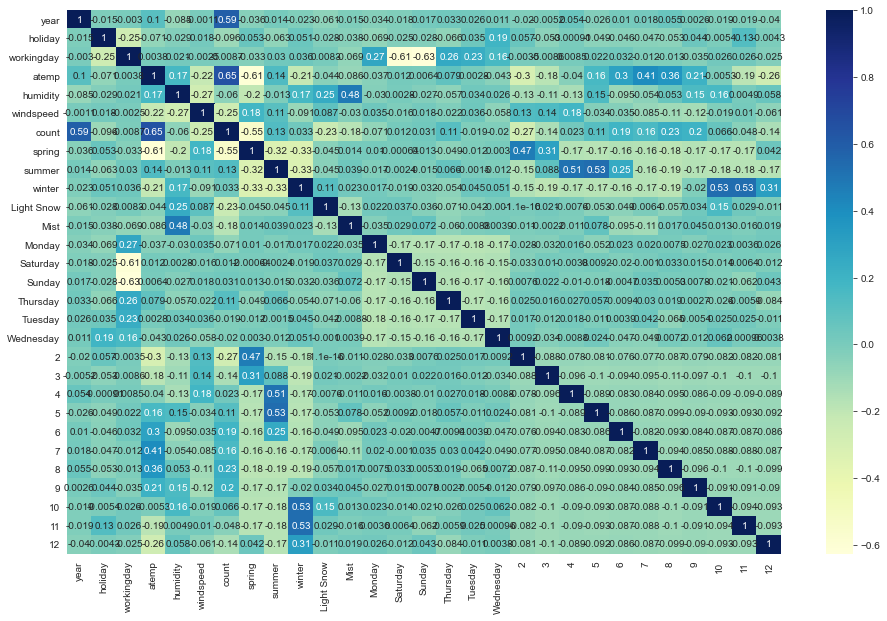

In [46]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(Bikes_train.corr(), annot = True, cmap="YlGnBu")
plt.show();

In [47]:
Bikes_train.corr()

,year,holiday,workingday,atemp,humidity,windspeed,count,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
year,1.000000,-0.014980,-0.003005,0.104206,-0.084792,-0.001108,0.591508,-0.036320,0.013856,-0.022638,...,-0.005172,0.053776,-0.025933,0.010484,0.017623,0.054774,0.002574,-0.018790,-0.018790,-0.040049
holiday,-0.014980,1.000000,-0.254149,-0.070640,-0.029093,0.017569,-0.095961,0.053339,-0.063232,0.050712,...,-0.053321,-0.000907,-0.049076,-0.045890,-0.046539,-0.052728,0.043692,-0.005387,0.127543,-0.004302
workingday,-0.003005,-0.254149,1.000000,0.003814,0.020701,-0.002504,-0.008723,-0.032886,0.030488,0.036097,...,-0.008563,0.008525,0.021720,0.032195,-0.012361,-0.012875,-0.034746,0.025939,0.025939,-0.025020
atemp,0.104206,-0.070640,0.003814,1.000000,0.169461,-0.215283,0.646475,-0.610741,0.135806,-0.211118,...,-0.178458,-0.040238,0.161923,0.295173,0.407105,0.360025,0.206157,-0.005262,-0.185697,-0.261862
humidity,-0.084792,-0.029093,0.020701,0.169461,1.000000,-0.266895,-0.059993,-0.201134,-0.013216,0.171579,...,-0.110761,-0.132898,0.145604,-0.095033,-0.053838,0.053185,0.152628,0.162014,0.004910,0.057832
windspeed,-0.001108,0.017569,-0.002504,-0.215283,-0.266895,1.000000,-0.253794,0.180743,0.110089,-0.090649,...,0.142173,0.183530,-0.034137,-0.035012,-0.085478,-0.111243,-0.121734,-0.018973,0.009952,-0.060975
count,0.591508,-0.095961,-0.008723,0.646475,-0.059993,-0.253794,1.000000,-0.548871,0.134343,0.032636,...,-0.137537,0.022998,0.113027,0.187821,0.157812,0.227229,0.201327,0.065692,-0.048130,-0.143598
spring,-0.036320,0.053339,-0.032886,-0.610741,-0.201134,0.180743,-0.548871,1.000000,-0.322955,-0.326377,...,0.305009,-0.165348,-0.171986,-0.160819,-0.163094,-0.184784,-0.167580,-0.174161,-0.174161,0.041868
summer,0.013856,-0.063232,0.030488,0.135806,-0.013216,0.110089,0.134343,-0.322955,1.000000,-0.328116,...,0.088068,0.511984,0.532539,0.254937,-0.163963,-0.185769,-0.168473,-0.175089,-0.175089,-0.172902
winter,-0.022638,0.050712,0.036097,-0.211118,0.171579,-0.090649,0.032636,-0.326377,-0.328116,1.000000,...,-0.189849,-0.167990,-0.174734,-0.163389,-0.165701,-0.187737,-0.020175,0.533619,0.533619,0.314816


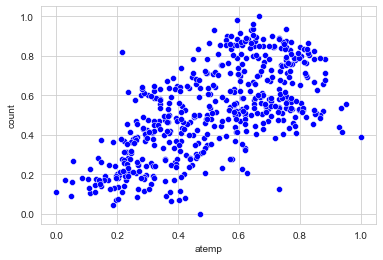

In [48]:
#checking correlation after scaling
sns.scatterplot(x='atemp',y='count' ,data=Bikes_train, color='Blue')
plt.show()

# Step 7: Dividing X and Y sets for model building

In [49]:
y_train = Bikes_train.pop('count')
X_train = Bikes_train

In [50]:
X_train.head()

,year,holiday,workingday,atemp,humidity,windspeed,spring,summer,winter,Light Snow,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,1,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


# Step 8:  Build a linear model

In [51]:

lm = LinearRegression()
lm.fit(X_train, y_train)

#RFE to run for 10 variables
rfe = RFE(lm,15) 
rfe = rfe.fit(X_train, y_train)


In [52]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('Monday', False, 10),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 14),
 ('Tuesday', False, 9),
 ('Wednesday', False, 13),
 (2, False, 8),
 (3, True, 1),
 (4, True, 1),
 (5, True, 1),
 (6, True, 1),
 (7, False, 7),
 (8, True, 1),
 (9, True, 1),
 (10, False, 2),
 (11, False, 11),
 (12, False, 12)]

In [53]:
col = X_train.columns[rfe.support_]
col

Index([      'year',    'holiday',      'atemp',   'humidity',  'windspeed',
           'spring',     'winter', 'Light Snow',       'Mist',            3,
                  4,            5,            6,            8,            9],
      dtype='object')

In [54]:

X_train.columns[~rfe.support_]

Index(['workingday',     'summer',     'Monday',   'Saturday',     'Sunday',
         'Thursday',    'Tuesday',  'Wednesday',            2,            7,
                 10,           11,           12],
      dtype='object')

In [55]:
X_train_rfe = X_train[col]

##### Model 1

In [56]:
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [57]:
lm1 = sm.OLS(y_train, X_train_rfe1).fit()

In [58]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.6
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          8.06e-186
Time:                        00:34:00   Log-Likelihood:                 506.64
No. Observations:                 510   AIC:                            -981.3
Df Residuals:                     494   BIC:                            -913.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2995      0.034      8.909      0.0

In [59]:
# Checking VIF
#Variance Inflation Factor or VIF
# VIF gives a basic quantitative idea about how much the feature variables are correlated with each other.
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,25.72
2,atemp,15.52
4,windspeed,4.56
5,spring,3.52
6,winter,3.21
8,Mist,2.26
0,year,2.08
13,8,1.90
11,5,1.77
10,4,1.68


##### Model 2

In [60]:
#dropped humidity as it had high VIF
X_train_rfe=X_train_rfe.drop([8],axis=1)

In [61]:
X_train_rfe2 = sm.add_constant(X_train_rfe)

In [62]:
lm2 = sm.OLS(y_train,X_train_rfe2).fit()

In [63]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.4
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.52e-184
Time:                        00:34:00   Log-Likelihood:                 500.87
No. Observations:                 510   AIC:                            -971.7
Df Residuals:                     495   BIC:                            -908.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3152      0.034      9.374      0.0

In [64]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,25.29
2,atemp,14.61
4,windspeed,4.55
5,spring,3.26
6,winter,2.70
8,Mist,2.26
0,year,2.08
10,4,1.48
11,5,1.45
12,6,1.35


##### Model 3

In [65]:
#dropping holiday because it has low VIF and P value
X_train_rfe=X_train_rfe.drop(['humidity'],axis=1)

In [66]:
X_train_rfe3 = sm.add_constant(X_train_rfe)


In [67]:
lm3 = sm.OLS(y_train,X_train_rfe3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     188.2
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          3.40e-182
Time:                        00:34:00   Log-Likelihood:                 492.54
No. Observations:                 510   AIC:                            -957.1
Df Residuals:                     496   BIC:                            -897.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2317      0.027      8.584      0.0

In [68]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.55
2,atemp,4.41
0,year,2.07
4,spring,1.97
5,winter,1.64
7,Mist,1.54
9,4,1.38
11,6,1.35
10,5,1.33
8,3,1.30


##### Model 4

In [69]:
X_train_rfe=X_train_rfe.drop([4],axis=1)

In [70]:
X_train_rfe4 = sm.add_constant(X_train_rfe)

In [71]:
lm4 = sm.OLS(y_train,X_train_rfe4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     202.6
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.28e-182
Time:                        00:34:00   Log-Likelihood:                 490.79
No. Observations:                 510   AIC:                            -955.6
Df Residuals:                     497   BIC:                            -900.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2529      0.025     10.313      0.0

In [72]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.41
3,windspeed,3.92
0,year,2.05
4,spring,1.79
7,Mist,1.53
5,winter,1.49
10,6,1.30
8,3,1.27
9,5,1.27
11,9,1.23


##### Model 5

In [73]:
X_train_rfe=X_train_rfe.drop([5],axis=1)

In [74]:
X_train_rfe5 = sm.add_constant(X_train_rfe)

In [75]:
lm5 = sm.OLS(y_train,X_train_rfe5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.5
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          3.51e-182
Time:                        00:34:00   Log-Likelihood:                 486.95
No. Observations:                 510   AIC:                            -949.9
Df Residuals:                     498   BIC:                            -899.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2650      0.024     10.917      0.0

In [76]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.11
3,windspeed,3.91
0,year,2.05
4,spring,1.75
7,Mist,1.51
5,winter,1.41
8,3,1.26
9,6,1.25
10,9,1.19
6,Light Snow,1.08


##### Model 6

In [77]:
X_train_rfe=X_train_rfe.drop([6],axis=1)

In [78]:
X_train_rfe6 = sm.add_constant(X_train_rfe)

In [79]:
lm6 = sm.OLS(y_train,X_train_rfe6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     239.1
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          3.67e-183
Time:                        00:34:00   Log-Likelihood:                 486.43
No. Observations:                 510   AIC:                            -950.9
Df Residuals:                     499   BIC:                            -904.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2649      0.024     10.912      0.0

In [80]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.91
2,atemp,3.70
0,year,2.05
4,spring,1.74
7,Mist,1.50
5,winter,1.38
8,3,1.25
9,9,1.16
6,Light Snow,1.08
1,holiday,1.05


##### Model 7

In [81]:
X_train_rfe=X_train_rfe.drop([3],axis=1)

In [82]:
X_train_rfe7 = sm.add_constant(X_train_rfe)

In [83]:
lm7 = sm.OLS(y_train,X_train_rfe7).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     262.1
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          5.42e-183
Time:                        00:34:00   Log-Likelihood:                 483.14
No. Observations:                 510   AIC:                            -946.3
Df Residuals:                     500   BIC:                            -903.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2679      0.024     10.990      0.0

In [84]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.86
2,atemp,3.70
0,year,2.05
4,spring,1.63
7,Mist,1.50
5,winter,1.37
8,9,1.16
6,Light Snow,1.08
1,holiday,1.04


##### Model 8

In [85]:
X_train_rfe=X_train_rfe.drop(['holiday'],axis=1)

In [86]:
X_train_rfe8 = sm.add_constant(X_train_rfe)

In [87]:
lm8 = sm.OLS(y_train,X_train_rfe8).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     286.9
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.29e-181
Time:                        00:34:01   Log-Likelihood:                 476.97
No. Observations:                 510   AIC:                            -935.9
Df Residuals:                     501   BIC:                            -897.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2656      0.025     10.777      0.0

In [88]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.85
1,atemp,3.70
0,year,2.05
3,spring,1.62
6,Mist,1.50
4,winter,1.35
7,9,1.15
5,Light Snow,1.08


##### Model 9

In [89]:
X_train_rfe=X_train_rfe.drop(['winter'],axis=1)

In [90]:
X_train_rfe9 = sm.add_constant(X_train_rfe)

In [91]:
lm9 = sm.OLS(y_train,X_train_rfe9).fit()
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     321.4
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          6.26e-181
Time:                        00:34:01   Log-Likelihood:                 472.38
No. Observations:                 510   AIC:                            -928.8
Df Residuals:                     502   BIC:                            -894.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3115      0.020     15.933      0.0

In [92]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,3.70
2,windspeed,3.66
0,year,2.02
3,spring,1.51
5,Mist,1.46
6,9,1.15
4,Light Snow,1.06


# Step 9: Residual Analysis

In [93]:
y_train_count = lm9.predict(X_train_rfe9)

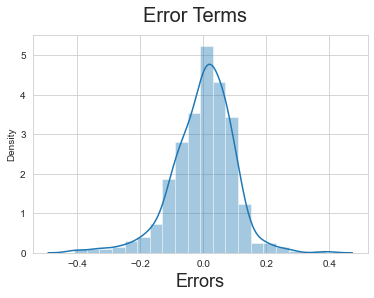

In [94]:
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 
plt.show;

# Step 10: Making predictions using the final model

In [95]:
num_vars=['atemp','humidity','windspeed','count']

#Fit on data
Bikes_test[num_vars] = scaler.transform(Bikes_test[num_vars])
Bikes_test.head()

,year,holiday,workingday,atemp,humidity,windspeed,count,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,0,0.496145,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,0,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [96]:

y_test = Bikes_test.pop('count')
X_test = Bikes_test
X_test.describe()

,year,holiday,workingday,atemp,humidity,windspeed,spring,summer,winter,Light Snow,...,3,4,5,6,7,8,9,10,11,12
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.532991,0.638508,0.313350,0.255708,0.264840,0.232877,0.027397,...,0.054795,0.091324,0.086758,0.095890,0.105023,0.059361,0.086758,0.082192,0.073059,0.086758
std,0.500722,0.188034,0.481313,0.217888,0.148974,0.159947,0.437258,0.442259,0.423633,0.163612,...,0.228100,0.288730,0.282125,0.295115,0.307285,0.236840,0.282125,0.275286,0.260830,0.282125
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344751,0.527265,0.198517,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.549198,0.627737,0.299459,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.714132,0.743928,0.403048,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [97]:
X_train_rfe.columns

Index(['year', 'atemp', 'windspeed', 'spring', 'Light Snow', 'Mist', 9], dtype='object')

In [98]:
 #Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,year,atemp,windspeed,spring,Light Snow,Mist,9
184,1.0,0,0.769660,0.084219,0,0,1,0
535,1.0,1,0.842587,0.153728,0,0,0,0
299,1.0,0,0.496145,0.334206,0,0,1,0
221,1.0,0,0.795343,0.339570,0,0,0,0
152,1.0,0,0.741471,0.537414,0,0,0,0


In [99]:
# Making predictions
y_pred = lm9.predict(X_test_new1)

In [100]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7991973469692764

In [1]:
Adj_r2=1-(1-0.7991973469692764)*(11-1)/(11-1-1)
print(Adj_r2)

0.7768859410769737


# Step 11: Model evaluation

<Figure size 432x288 with 0 Axes>

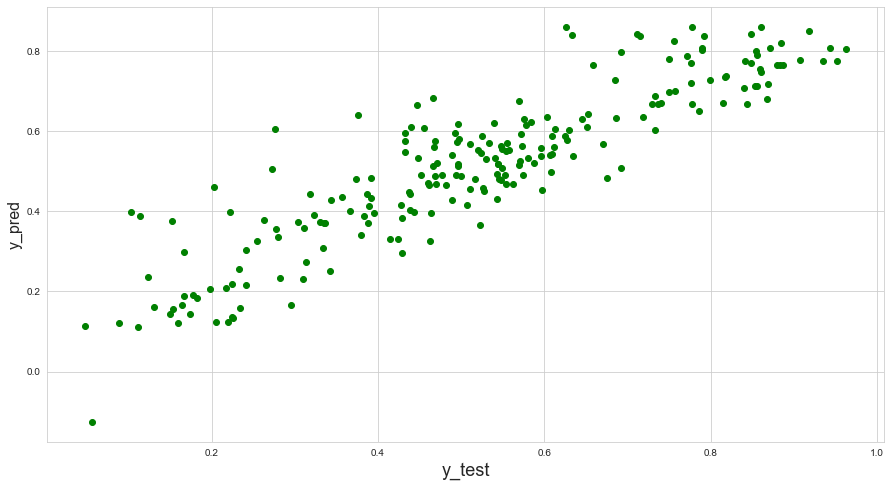

In [101]:
#plot the graph on actual and predicted values
# plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,color='green')
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)
plt.show;

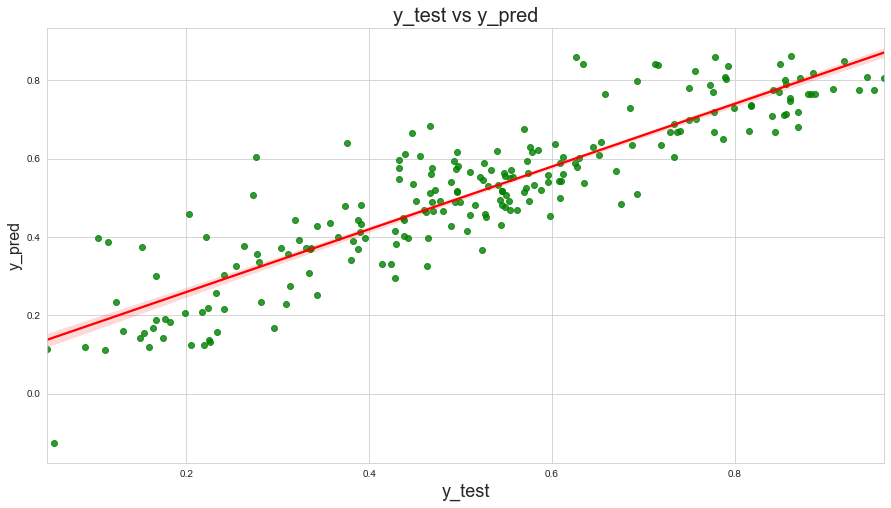

In [102]:
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)                         
plt.show()

##### Equation for best fit line

# Step 12: Comparing training and test model

# Step 13: Inference from the model